# **1. Import Library**

In [81]:
# ! pip install xgboost
# ! pip install lightgbm

In [35]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    make_scorer, roc_auc_score, accuracy_score, 
    classification_report, precision_score, recall_score, f1_score
)

import pickle

# **2. Read Dataset**

### Data Train

In [2]:
train = pd.read_csv('../datasets/train.csv')

print(train.shape)
train.head()

(1176, 36)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,80,3,29,2,3,3,2,1,2,0
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,80,1,3,2,3,2,1,2,1,0
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,80,1,23,3,3,12,9,4,9,0
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,80,0,7,1,3,7,4,0,6,0
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,80,1,10,3,3,8,7,4,7,0


In [3]:
info_train = pd.DataFrame({
    'Column': train.columns,
    'Non-Null Count': train.notnull().sum().values,
    'Dtype': train.dtypes.values
})
info_train

,Column,Non-Null Count,Dtype
0,id,1176,object
1,Age,1176,int64
2,BusinessTravel,1176,object
3,DailyRate,1176,int64
4,Department,1176,object
5,DistanceFromHome,1176,int64
6,Education,1176,int64
7,EducationField,1176,object
8,EmployeeCount,1176,int64
9,EmployeeNumber,1176,int64


### Data Test

In [4]:
test = pd.read_csv('../datasets/test.csv')

print(test.shape)
test.head()

(294, 35)


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,...,3,80,1,1,2,3,1,0,0,0
1,PJ010,44,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1,1246,...,4,80,1,10,5,3,10,5,7,7
2,GJ831,31,Travel_Rarely,688,Sales,7,3,Life Sciences,1,613,...,3,80,1,10,3,2,5,4,0,1
3,JD352,44,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1,1288,...,4,80,2,26,4,2,25,9,14,13
4,WZ263,36,Travel_Rarely,318,Research & Development,9,3,Medical,1,90,...,1,80,1,2,0,2,1,0,0,0


In [5]:
info_test = pd.DataFrame({
    'Column': test.columns,
    'Non-Null Count': test.notnull().sum().values,
    'Dtype': test.dtypes.values
})
info_test

,Column,Non-Null Count,Dtype
0,id,294,object
1,Age,294,int64
2,BusinessTravel,294,object
3,DailyRate,294,int64
4,Department,294,object
5,DistanceFromHome,294,int64
6,Education,294,int64
7,EducationField,294,object
8,EmployeeCount,294,int64
9,EmployeeNumber,294,int64


# **3. Quick EDA**

### Cek Duplikasi Data

In [6]:
print (f"Duplikasi Train : {train.duplicated().sum()}")
print (f"Duplikasi Test : {test.duplicated().sum()}")

Duplikasi Train : 0
Duplikasi Test : 0


### Cek Missing Value

In [88]:
# sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [7]:
def cek_missing_value(df):
    return pd.DataFrame({
        'Missing Value': df.isna().sum(),
        'Percentage (%)': df.isna().mean() * 100
    })

In [8]:
cek_missing_value(train)

,Missing Value,Percentage (%)
id,0,0.0
Age,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [9]:
cek_missing_value(test)

,Missing Value,Percentage (%)
id,0,0.0
Age,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


### Statistika Deskriptif

In [96]:
train.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.998299,9.178142,18.0,30.00,36.0,43.00,60.00
DailyRate,1176.0,803.991497,401.339423,103.0,467.75,799.5,1157.00,1499.00
DistanceFromHome,1176.0,9.357993,8.179803,1.0,2.00,7.0,14.00,29.00
Education,1176.0,2.906463,1.027996,1.0,2.00,3.0,4.00,5.00
EmployeeCount,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.00
EmployeeNumber,1176.0,1015.830782,599.657438,1.0,487.75,1004.5,1547.25,2062.00
EnvironmentSatisfaction,1176.0,2.716837,1.088707,1.0,2.00,3.0,4.00,4.00
HourlyRate,1176.0,65.500000,20.373324,30.0,48.00,66.0,83.00,100.00
JobInvolvement,1176.0,2.737245,0.703673,1.0,2.00,3.0,3.00,4.00
JobLevel,1176.0,2.076531,1.091987,1.0,1.00,2.0,3.00,5.00


In [97]:
train.describe(include='object').T

,count,unique,top,freq
id,1176,1173,TP136,2
BusinessTravel,1176,3,Travel_Rarely,828
Department,1176,3,Research & Development,764
EducationField,1176,6,Life Sciences,479
Gender,1176,2,Male,704
JobRole,1176,9,Sales Executive,273
MaritalStatus,1176,3,Married,540
Over18,1176,1,Y,1176
OverTime,1176,2,No,836


In [98]:
test.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Age,294.0,36.625850,8.971484,18.0,30.00,35.0,42.00,59.0
DailyRate,294.0,796.462585,412.713840,102.0,443.25,810.5,1179.75,1495.0
DistanceFromHome,294.0,8.530612,7.786666,1.0,2.00,6.0,11.75,29.0
Education,294.0,2.938776,1.010015,1.0,2.00,3.0,4.00,5.0
EmployeeCount,294.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,294.0,1061.003401,611.096064,4.0,501.00,1070.5,1614.75,2068.0
EnvironmentSatisfaction,294.0,2.741497,1.112071,1.0,2.00,3.0,4.00,4.0
HourlyRate,294.0,67.455782,20.111203,30.0,50.25,67.0,85.00,100.0
JobInvolvement,294.0,2.700680,0.742792,1.0,2.00,3.0,3.00,4.0
JobLevel,294.0,2.013605,1.165408,1.0,1.00,2.0,2.00,5.0


In [99]:
test.describe(include="object").T

,count,unique,top,freq
id,294,294,MQ920,1
BusinessTravel,294,3,Travel_Rarely,215
Department,294,3,Research & Development,197
EducationField,294,6,Life Sciences,127
Gender,294,2,Male,178
JobRole,294,9,Research Scientist,72
MaritalStatus,294,3,Married,133
Over18,294,1,Y,294
OverTime,294,2,No,218


### Cek Distribusi Variabel Numerik

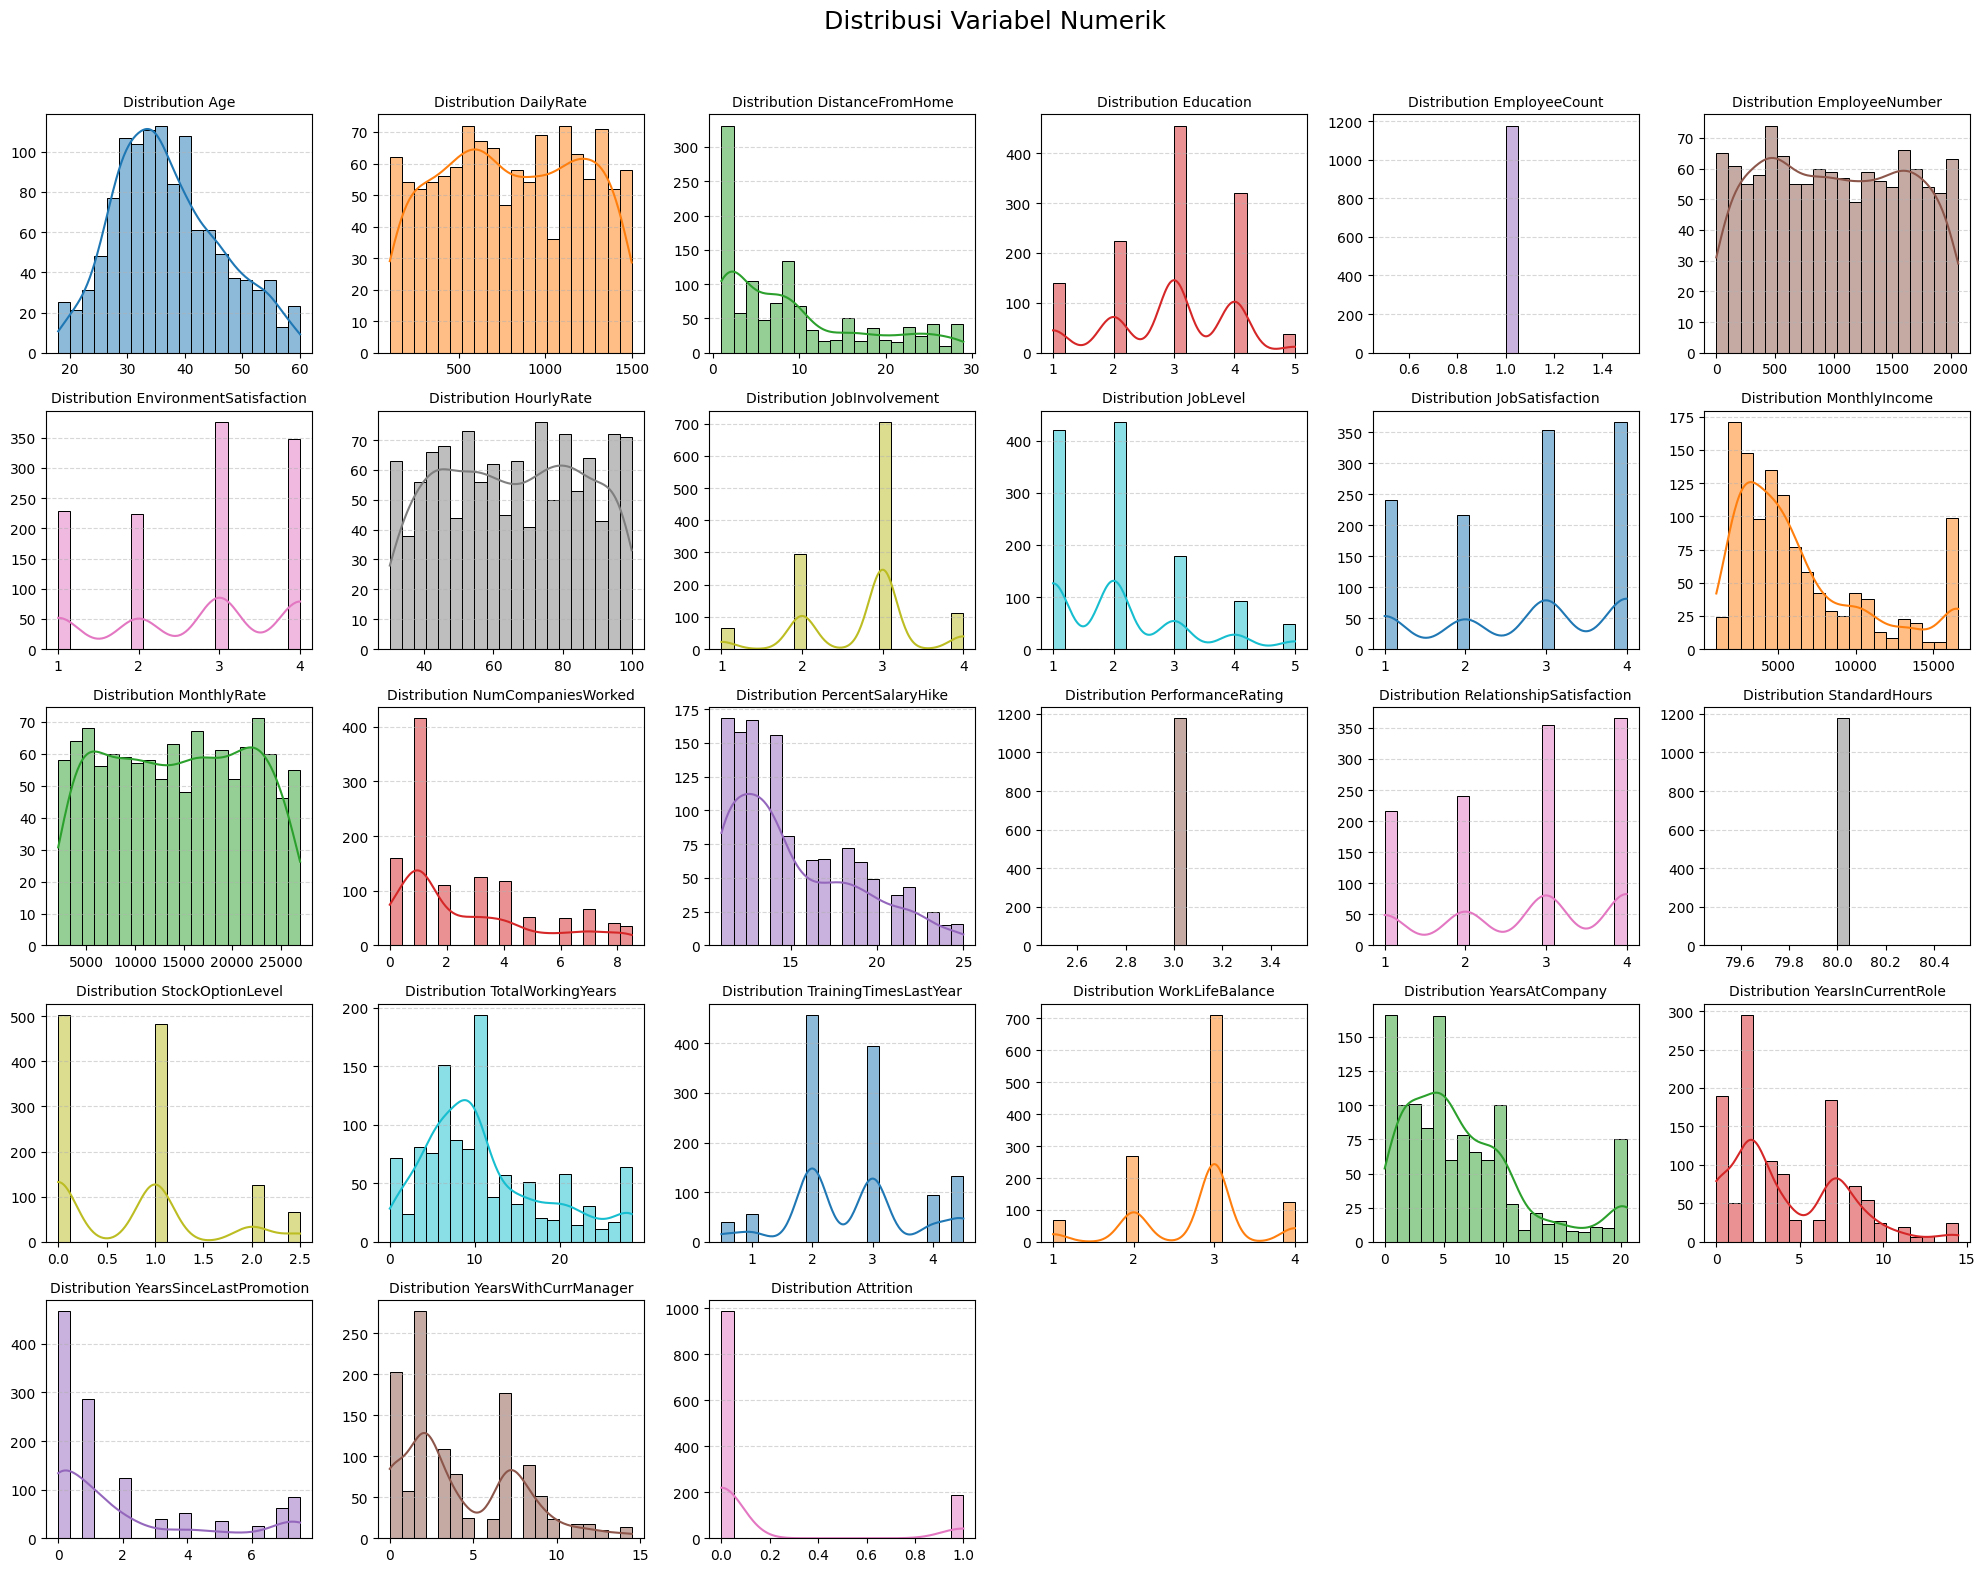

In [100]:
num_train = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
             'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
             'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
             'Attrition']

colors = sns.color_palette('tab10', n_colors=len(num_train))

plt.figure(figsize=(20, 16))
for i, col in enumerate(num_train, 1):
    plt.subplot(5, 6, i)
    sns.histplot(train[col], kde=True, bins=20, edgecolor='black', color=colors[i-1])
    plt.title(f'Distribution {col}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Distribusi Variabel Numerik', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Cek Distribusi Variabel Kategorik

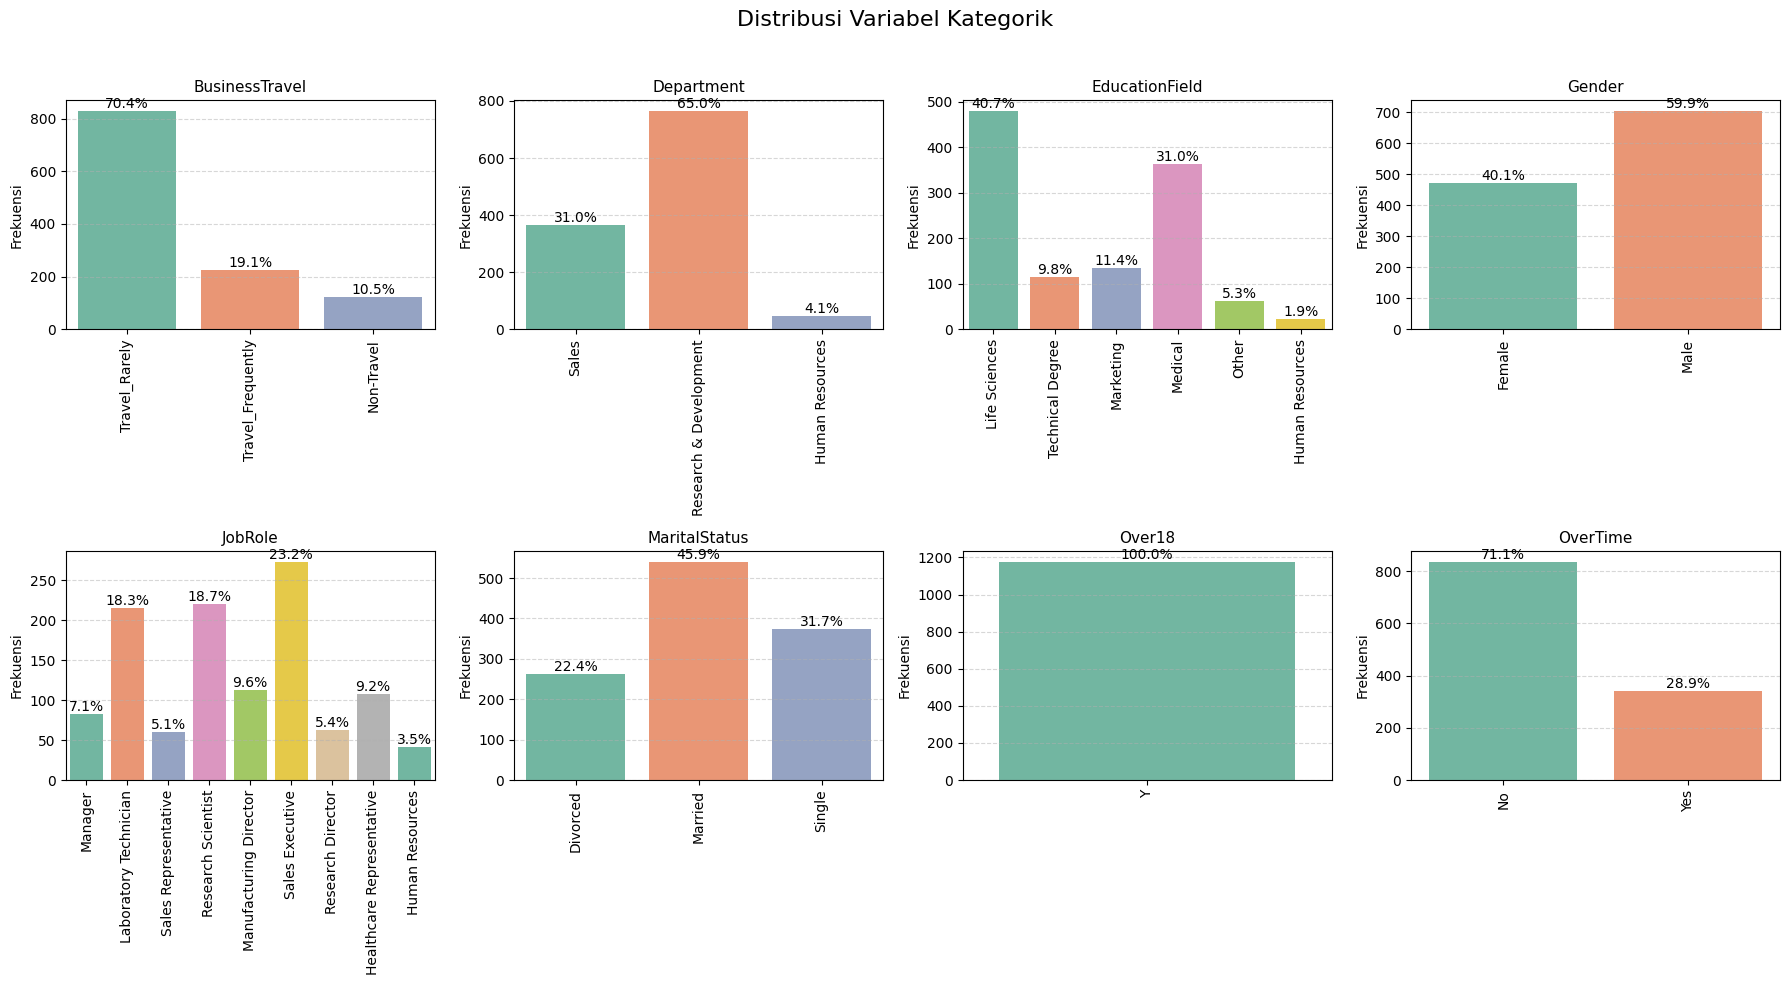

In [101]:
cat_train = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
             'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_train, 1):
    plt.subplot(2, 4, i)
    ax = sns.countplot(data=train, x=col, palette='Set2')
    total = len(train)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    plt.title(f'{col}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Distribusi Variabel Kategorik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Drop Fitur yang Tidak Digunakan

In [10]:
train.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], inplace=True)
test.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], inplace=True)

# **4. Splitting Dataset**

In [11]:
X = train.drop(columns=['id', 'Attrition'])
y = train['Attrition']

X_test = test.drop(columns=['id'])

print(X.shape, y.shape, X_test.shape)

(1176, 30) (1176,) (294, 30)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **5. Preprocessing**

In [13]:
num_col = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
             'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
             'JobRole', 'MaritalStatus', 'OverTime']

In [14]:
num_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_col),
        ('cat', cat_transform, cat_col)
    ]
)

# **6. Training**

In [ ]:
# model-model
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBMClassifier": LGBMClassifier(random_state=42, verbose=-1),
    "SVC": SVC(probability=True, random_state=42)
}

# scorer AUC
auc = make_scorer(roc_auc_score, needs_proba=True)

In [16]:
# pastikan index reset dulu
X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

In [17]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n=== {name} ===")
    pipe = Pipeline(steps=[ 
        ('preprocessor', preprocessor),  
        ('model', model)
        ])

    fold = 1
    auc_scores = []
    
    for train_idx, test_idx in kfold.split(X_train, y_train):
        # Kalau X_train DataFrame → pakai iloc
        # Kalau array → pakai indexing biasa
        if hasattr(X_train, 'iloc'):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
        else:
            X_tr, X_val = X_train[train_idx], X_train[test_idx]
            y_tr, y_val = y_train[train_idx], y_train[test_idx]

        # Fit dan prediksi probabilitas
        pipe.fit(X_tr, y_tr)
        y_prob = pipe.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_prob)
        print(f"Fold {fold} - AUC: {auc:.4f}")
        auc_scores.append(auc)
        fold += 1

    print(f"{name} - Mean AUC: {np.mean(auc_scores):.4f}")


=== LogisticRegression ===
Fold 1 - AUC: 0.8150
Fold 2 - AUC: 0.8189
Fold 3 - AUC: 0.8383
LogisticRegression - Mean AUC: 0.8241

=== RandomForest ===
Fold 1 - AUC: 0.7979
Fold 2 - AUC: 0.7625
Fold 3 - AUC: 0.7982
RandomForest - Mean AUC: 0.7862

=== XGBClassifier ===
Fold 1 - AUC: 0.7849
Fold 2 - AUC: 0.7888
Fold 3 - AUC: 0.8157
XGBClassifier - Mean AUC: 0.7965

=== LGBMClassifier ===
Fold 1 - AUC: 0.7907
Fold 2 - AUC: 0.7685
Fold 3 - AUC: 0.8341
LGBMClassifier - Mean AUC: 0.7978

=== SVC ===
Fold 1 - AUC: 0.7830
Fold 2 - AUC: 0.8008
Fold 3 - AUC: 0.8816
SVC - Mean AUC: 0.8218


# **7. Hyperparameter Tuning**

In [41]:
# Logistic Regression
logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

param_grid_lr = {
    'model__penalty': ['l1', 'l2', 'elasticnet'],   # jenis regularisasi
    'model__C': [0.01, 0.1, 1, 10, 100],                 
    'model__solver': ['liblinear'],         
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1', 'l2', ...], 'model__solver': ['liblinear']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [42]:
print("=== Logistic Regression ===")
print(f"Best AUC Score: {grid_lr.best_score_:.4f}")
print("Best Parameters:", grid_lr.best_params_)

=== Logistic Regression ===
Best AUC Score: 0.8280
Best Parameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [52]:
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True, class_weight='balanced', random_state=42))  
])

param_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_svc,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.1, 1, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'rbf', ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [53]:
print("=== SVC ===")
print(f"Best AUC Score: {grid_svc.best_score_:.4f}")
print("Best Parameters:", grid_svc.best_params_)

=== SVC ===
Best AUC Score: 0.8306
Best Parameters: {'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}


# **8. Stacking Ensemble**

In [64]:
estimators = [
    ('logreg', grid_lr.best_estimator_),
    ('svc', grid_svc.best_estimator_)
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_val)
print("=== Stacking Ensemble ===")
print("Accuracy:", accuracy_score(y_val, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_val, stack_model.predict_proba(X_val)[:, 1]))
print(classification_report(y_val, y_pred_stack))

=== Stacking Ensemble ===
Accuracy: 0.939297124600639
ROC AUC: 0.9515791049244124
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       262
           1       0.90      0.71      0.79        51

    accuracy                           0.94       313
   macro avg       0.92      0.85      0.88       313
weighted avg       0.94      0.94      0.94       313



# **9. Prediksi**

In [67]:
pred = stack_model.predict(X_test)
pred_prob = stack_model.predict_proba(X_test)[:,1]

In [68]:
submission = pd.read_csv('../datasets/sample_submission.csv')
submission['Attrition'] = pred_prob
submission.to_csv('../datasets/submission.csv', index=False)

# **10. Save Model**

In [66]:
best_model = stack_model
with open('../model/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)